<a href="https://colab.research.google.com/github/mdnafees33/Edulumos-Internship/blob/main/edulumos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv('/content/house_price_dataset (1).csv')
df.head(4)

,House_ID,Area,Bedrooms,Bathrooms,Garage,Year_Built,Location,Price
0,1,1360,5,2,0,1964,B,248239
1,2,4272,5,2,1,1959,D,693992
2,3,3592,6,2,3,1991,D,619850
3,4,966,2,4,0,2021,C,176382


In [ ]:
df.drop(columns=['House_ID','Location'],inplace=True)

In [ ]:
df.head(4)

,Area,Bedrooms,Bathrooms,Garage,Year_Built,Price
0,1360,5,2,0,1964,248239
1,4272,5,2,1,1959,693992
2,3592,6,2,3,1991,619850
3,966,2,4,0,2021,176382


In [ ]:
df.isnull().sum()

,0
Area,0
Bedrooms,0
Bathrooms,0
Garage,0
Year_Built,0
Price,0


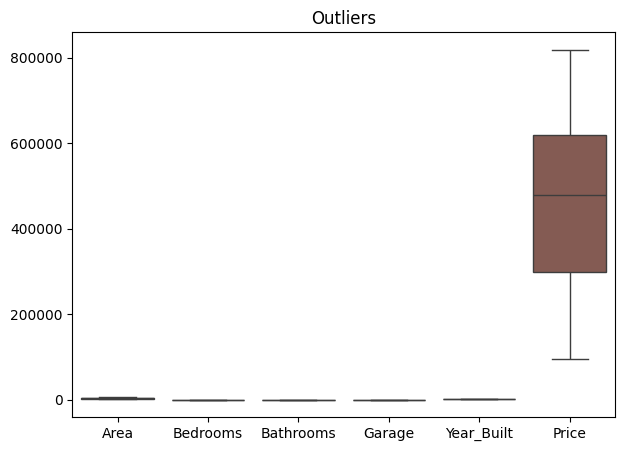

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(df)
plt.title('Outliers')
plt.show()

In [ ]:
x=df.iloc[:,:-1]
y=df['Price']

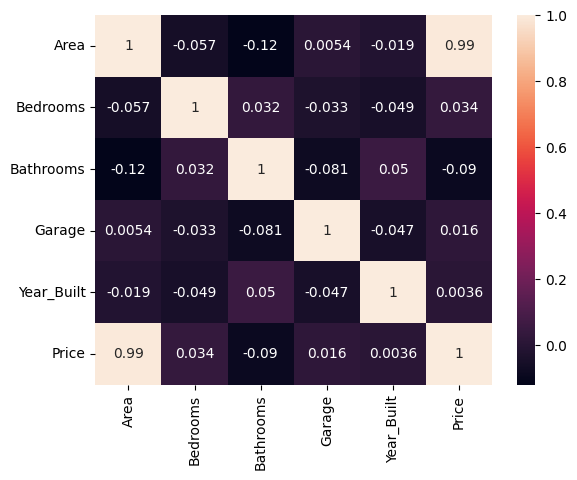

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.heatmap(df.corr(),annot=True)
plt.show()
plt.clf()

In [ ]:
x=df.iloc[:,:-1]
y=df['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)


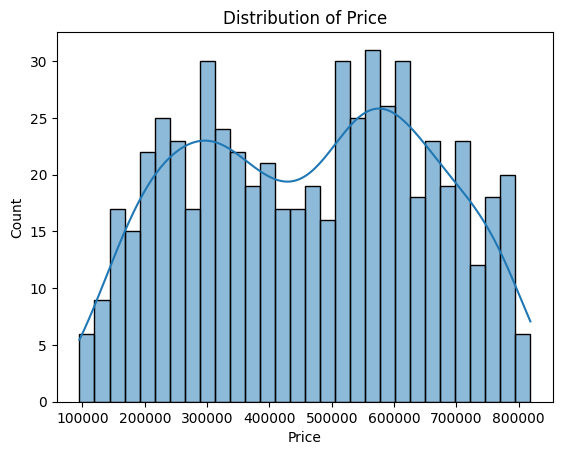

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['Price'], kde=True, bins=30)
plt.title('Distribution of Price')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
lr.score(x_train,y_train)*100

99.90432257080532

In [ ]:
y_pred = lr.predict(x_test)
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# --- Evaluate ---
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R² Score: 0.9991719522497438
MAE: 4836.843314846855
MSE: 32601222.404170398
RMSE: 5709.748015820873


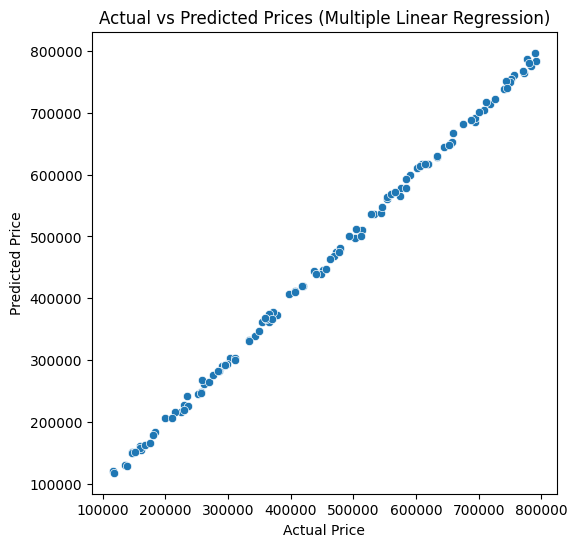

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices (Multiple Linear Regression)")
plt.show()

In [ ]:
import gradio as gr
def predict_price(area, bedrooms, bathrooms, garage, year_built):
    features = np.array([[area, bedrooms, bathrooms, garage, year_built]])
    price = lr.predict(features)[0]
    return f"Estimated House Price: ₹{price:,.2f}"

# --- Gradio interface ---
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Number(label="Area (sq ft)"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms"),
        gr.Number(label="Garage"),
        gr.Number(label="Year Built")
    ],
    outputs="text",
    title="House Price Predictor 🏠"
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6730acdcada1849260.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
